### Data Science Salaries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### EDA

In [3]:
dataset_name = 'ds_salaries'
df1 = pd.read_csv(f'data/{dataset_name}.csv')
df2 = pd.read_csv(f'data/{dataset_name}_2.csv')

In [4]:
df1

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [5]:
df2

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [6]:
# Eliminem atributs innecesaris
att_to_delete = []
#att_to_delete = ['salary']
df_1 = df1.drop(att_to_delete, axis=1)

att_to_delete_df2 = att_to_delete
att_to_delete_df2.append(df2.columns[0])
df_2 = df2.drop(att_to_delete_df2, axis=1)
# Concatenem els datasets
df = pd.concat([df_1, df_2], ignore_index=True)
#df = df.rename(columns={'salary_in_usd': 'salary'})
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
4357,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
4358,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
4359,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
4360,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


Observem els NaNs i els duplicats que tenim al dataset:

In [7]:
print("Nans")
print(df.isna().sum())
print(f"Dades duplicades: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)

Nans
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64
Dades duplicades: 1694


Com no tenim cap Nan, no hem de fer cap tractament sobre aquests. Tot i això tenim 1694 dades repetides, les eliminem.

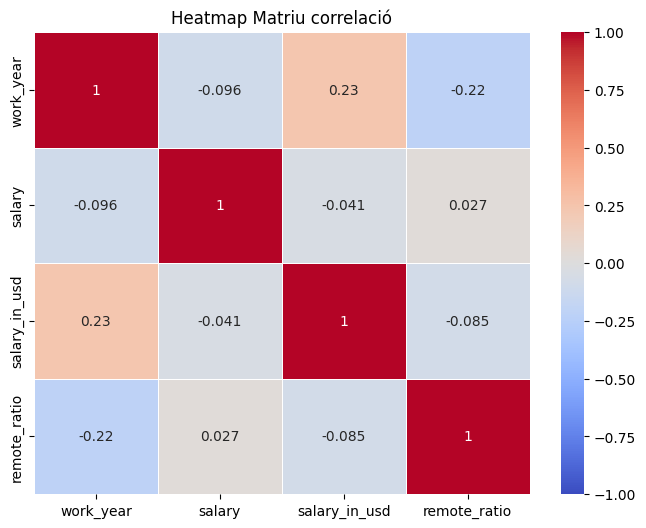

In [8]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title("Heatmap Matriu correlació")
plt.show()

Com les variable 'salary' i 'salary_in_usd' són les variables que volem predir, de primeres tenim pensat eliminar la variable 'salary' i predir 'salary_in_usd' ja que, com podem observar en el Heatmap, aquesta última variable té una correlació de 0.23 amb la variable 'work_year'. Això és a priori, ja que això són les correlacions lineals, després quan fem servir altres mètodes podria canviar.

Canviem alguns atributs per entendre millor les dades:
- 'company_size': 'S'->'Small', 'M'->'Medium', 'L'->'Large'
- 'remote_ratio': 100->'Online', 50->'Blended' (semipresencial), 0->'Face-to-face' (presencial)
- 'employment_type': 'FT'->'Full time', 'CT'->'Contractual', 'PT'->'Part time', 'FL'->'Freelancer'
- 'experience_level': 'SE'->'Senior', 'MI'->'Mid level', 'EN'->'Entry level', 'EX'->'Executve level'

In [9]:
df['company_size'] = df['company_size'].replace({'S':'Small', 'M':'Medium','L':'Large'})
df['remote_ratio'] = df['remote_ratio'].replace({100: 'Online', 0:'Face-to-face', 50:'Blended'})
df['employment_type'] = df['employment_type'].replace({'FT':'Full_time', 'CT':'Contractual','PT':'Part_time', 'FL':'Freelancer'})
df['experience_level'] = df['experience_level'].replace({'SE':'Senior', 'MI':'Mid_level', 'EN':'Entry_level', 'EX': 'Executive_level'})

In [10]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,Full_time,Principal Data Scientist,80000,EUR,85847,ES,Online,ES,Large
1,2023,Mid_level,Contractual,ML Engineer,30000,USD,30000,US,Online,US,Small
2,2023,Mid_level,Contractual,ML Engineer,25500,USD,25500,US,Online,US,Small
3,2023,Senior,Full_time,Data Scientist,175000,USD,175000,CA,Online,CA,Medium
4,2023,Senior,Full_time,Data Scientist,120000,USD,120000,CA,Online,CA,Medium
...,...,...,...,...,...,...,...,...,...,...,...
4272,2022,Mid_level,Full_time,Data Engineer,62000,EUR,68147,FR,Online,FR,Medium
4273,2022,Mid_level,Full_time,Data Scientist,115000,CHF,122346,CH,Face-to-face,CH,Large
4275,2022,Mid_level,Full_time,Data Scientist,88000,CAD,69336,CA,Online,CA,Medium
4322,2022,Mid_level,Full_time,Data Analyst,50000,GBP,65438,GB,Face-to-face,GB,Medium


Veamos los títulos más frecuentes:

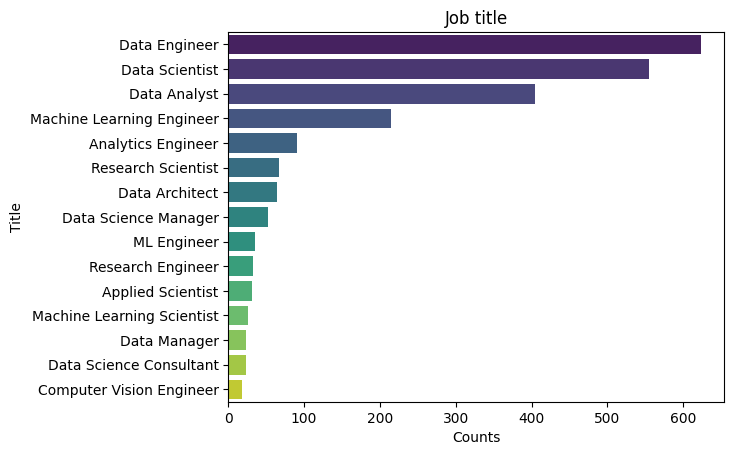

In [11]:
counts_job_title = df['job_title'].value_counts().head(15)    

sns.barplot(x=counts_job_title.values, y=counts_job_title.index,palette='viridis')
plt.xlabel('Counts')
plt.ylabel('Title')
plt.title('Job title')
plt.show()

Vamos a calcular el salario promedio de los 15 trabajos más frecuentes mostrados en esta última figura:

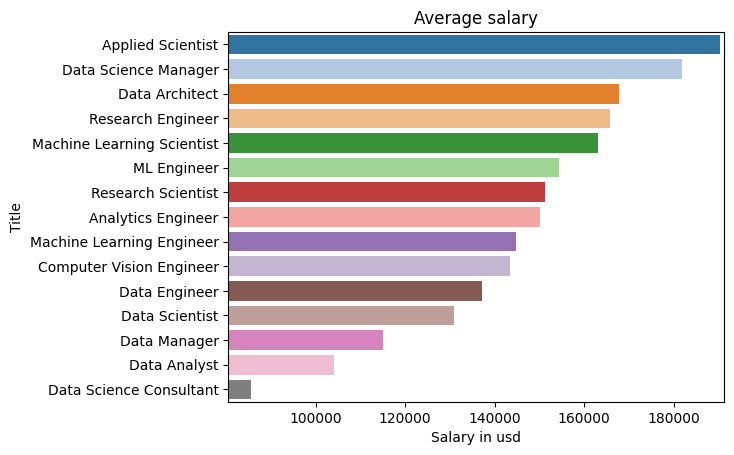

In [12]:
df_jobs = df[df['job_title'].isin(counts_job_title.index)]
average_salary = df_jobs.groupby('job_title')['salary_in_usd'].mean()
average_salary = average_salary.sort_values(ascending=False)

sns.barplot(x=average_salary.values, y=average_salary.index,palette='tab20')
plt.xlim(min(average_salary.values)-5000, max(average_salary.values)+1000)
plt.xlabel('Salary in usd')
plt.ylabel('Title')
plt.title('Average salary')
plt.show()

Vamos a ver los top 10 salarios medios más elevados:

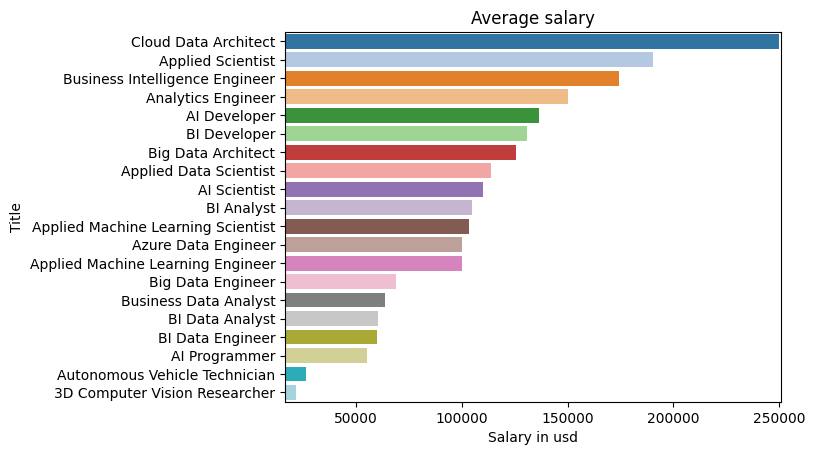

In [13]:
average_salary = df.groupby('job_title')['salary_in_usd'].mean().head(20)
average_salary = average_salary.sort_values(ascending=False)
sns.barplot(x=average_salary.values, y=average_salary.index,palette='tab20')
plt.xlim(min(average_salary.values)-5000, max(average_salary.values)+1000)
plt.xlabel('Salary in usd')
plt.ylabel('Title')
plt.title('Average salary')
plt.show()

In [14]:
def convert_to_categorical(df, variable):
    dummies = pd.get_dummies(df[variable], dtype='int',drop_first=False)
    dummies = dummies.rename(columns=lambda x: f"{x}")
    df = pd.concat([df, dummies], axis=1)
    df = df.drop([variable], axis="columns")
    return df

In [15]:
variables_categoricals = ['experience_level','salary_currency', 'employment_type', 'job_title','employee_residence','company_location','remote_ratio','company_size']

df_dummies = df
for v in variables_categoricals:
    df_dummies = convert_to_categorical(df_dummies, v)
df_dummies

,work_year,salary,salary_in_usd,Entry_level,Executive_level,Mid_level,Senior,AUD,BRL,CAD,...,TR,UA,US,VN,Blended,Face-to-face,Online,Large,Medium,Small
0,2023,80000,85847,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,2023,30000,30000,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
2,2023,25500,25500,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
3,2023,175000,175000,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,2023,120000,120000,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,2022,62000,68147,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4273,2022,115000,122346,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4275,2022,88000,69336,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
4322,2022,50000,65438,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [16]:
from sklearn.preprocessing import StandardScaler

target_att = 'salary'
attributes = [k for k in df.keys() if k!= target_att]
def normalize_SS(data):
    X = data[attributes]
    y = data[[target_att]]
    sc = StandardScaler()
    X_norm = sc.fit_transform(X)
    y_norm = sc.fit_transform(y)
    return [y_norm, X_norm]

def normalize_log(data):
    df_m = data+1 # Sumamos 1 porque para normalizar con log no podemos tener 0
    df_log = np.log(df_m)
    df_normalized = (df_log - df_log.min()) / (df_log.max() - df_log.min())
    df_normalized
    X_norm = df_normalized[attributes].to_numpy()
    y_norm = df_normalized[[target_att]].to_numpy()
    return [y_norm, X_norm]